In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\SAURABH\OneDrive\Desktop\Accredian\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape


(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# Check is null
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#check fraud transactions
df['isFraud'].value_counts()    

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
import warnings
warnings.filterwarnings('ignore')

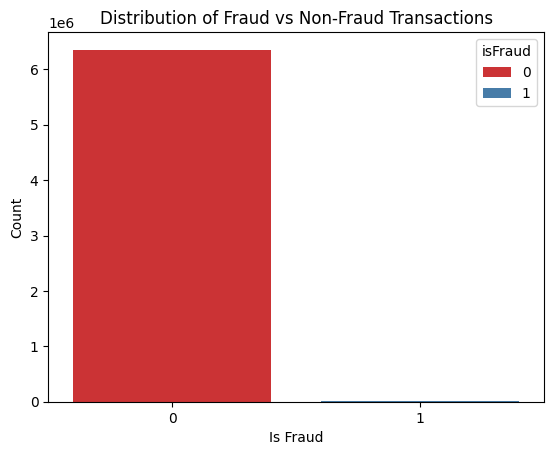

In [35]:
#check fraud transactions see the distribution fraud and non fraud

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='isFraud', data=df, palette='Set1',hue='isFraud')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [11]:
import numpy as np
df['log_amount']=np.log1p(df['amount'])

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9.194276
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,7.531166
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,5.204007
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,5.204007
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,9.364703


In [13]:
# create new column 'balanceDiffOrigin' as difference between 'oldbalanceOrg' and 'newbalanceOrig'
df['balanceDiffOrigin'] = df['oldbalanceOrg'] - df['newbalanceOrig']
print(df['balanceDiffOrigin'].head())

#create new column 'balanceDiffDest' as difference between 'oldbalanceDest' and 'newbalanceDest'
df['balanceDiffDest'] = df['oldbalanceDest'] - df['newbalanceDest']
print(df['balanceDiffDest'].head())
df

#create new column 'isMerchant' to indicate if the transaction is a merchant transaction
df['isMerchant'] = df['nameDest'].str.startswith('M').astype(int)
print(df['isMerchant'].head())


# create new column originZeroAfter to indicate if newbalanceOrig is zero after transaction
df['originZeroAfter'] = (df['newbalanceOrig'] == 0).astype(int)
print(df['originZeroAfter'].head())

# create new column destZeroAfter to indicate if oldbalanceDest is zero after transaction
df['destZeroAfter'] = (df['oldbalanceDest'] == 0).astype(int)
print(df['destZeroAfter'].head())

0     9839.64
1     1864.28
2      181.00
3      181.00
4    11668.14
Name: balanceDiffOrigin, dtype: float64
0        0.0
1        0.0
2        0.0
3    21182.0
4        0.0
Name: balanceDiffDest, dtype: float64
0    1
1    1
2    0
3    0
4    1
Name: isMerchant, dtype: int32
0    0
1    0
2    1
3    1
4    0
Name: originZeroAfter, dtype: int32
0    1
1    1
2    1
3    0
4    1
Name: destZeroAfter, dtype: int32


In [14]:
# drop unnecessary columns
df=df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [15]:
# convert type to typeint
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [16]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,log_amount,balanceDiffOrigin,balanceDiffDest,isMerchant,originZeroAfter,destZeroAfter,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,9.194276,9839.64,0.0,1,0,1,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,7.531166,1864.28,0.0,1,0,1,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,5.204007,181.00,0.0,0,1,1,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,5.204007,181.00,21182.0,0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,9.364703,11668.14,0.0,1,0,1,False,False,True,False


In [17]:
# Target variable
y = df['isFraud']

# Feature set (drop IDs & target)
X = df.drop(['isFraud'], axis=1)

In [18]:
# Split the data into training and testing sets with stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,     
    random_state=42
)


In [19]:
# train model with random forest
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_samples=0.5,
    criterion='entropy',
    class_weight={0:1, 1:10},
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metr

In [20]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5090096, 16)
Test shape: (1272524, 16)


In [21]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(exclude='object').columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: []
Numerical columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'log_amount', 'balanceDiffOrigin', 'balanceDiffDest', 'isMerchant', 'originZeroAfter', 'destZeroAfter', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [22]:
X_test.dtypes


step                   int64
amount               float64
oldbalanceOrg        float64
newbalanceOrig       float64
oldbalanceDest       float64
newbalanceDest       float64
log_amount           float64
balanceDiffOrigin    float64
balanceDiffDest      float64
isMerchant             int32
originZeroAfter        int32
destZeroAfter          int32
type_CASH_OUT           bool
type_DEBIT              bool
type_PAYMENT            bool
type_TRANSFER           bool
dtype: object

In [31]:
# Class predictions (0/1)
y_pred = rf.predict(X_test)

# Probabilities (needed for ROC, PR, threshold tuning)
y_proba = rf.predict_proba(X_test)[:, 1]



In [24]:
#model evaluation

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[1270772,     109],
       [    225,    1418]], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

precision = cm[1,1] / (cm[0,1] + cm[1,1])
recall = cm[1,1] / (cm[1,0] + cm[1,1])

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9286182056319581
Recall: 0.8630553864881315


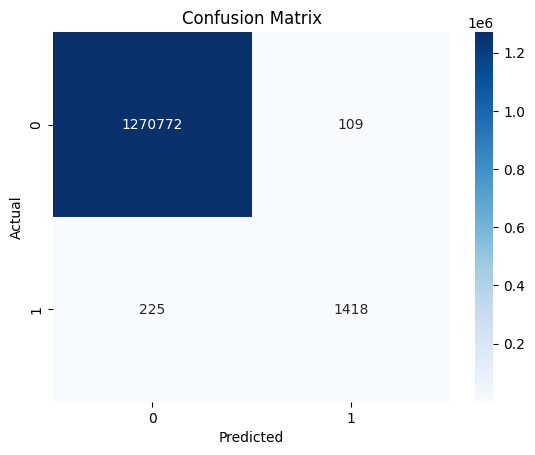

In [37]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [25]:
single_transaction = X_test.iloc[[0]]
prediction = rf.predict(single_transaction)
probability = rf.predict_proba(single_transaction)[:, 1]

print("Prediction:", prediction[0])
print("Fraud Probability:", probability[0])

Prediction: 0
Fraud Probability: 0.0


In [26]:
threshold = 0.2

is_fraud = (probability[0] >= threshold)

print("Fraud Detected:", int(is_fraud))

Fraud Detected: 0


In [27]:
import pandas as pd

new_data = pd.read_csv(r"C:\Users\SAURABH\Downloads\fraud_sample.csv")  # Load new transaction data

new_data_encoded = pd.get_dummies(new_data, columns=['type'])


# Ensure same columns as training data
new_data_encoded = new_data_encoded.reindex(
    columns=X_train.columns,
    fill_value=0
)
new_data_encoded.head()


predictions = rf.predict(new_data_encoded)
probabilities = rf.predict_proba(new_data_encoded)[:, 1]

 # add results
new_data['isFraud_Prediction'] = predictions
new_data['Fraud_Probability'] = probabilities

new_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFraud_Prediction,Fraud_Probability
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0,0.420635
1,1,CASH_OUT,215310.0,705.0,0.0,22425.0,0.0,1,0,0.205921
2,2,PAYMENT,7050.0,7050.0,0.0,0.0,0.0,0,0,0.094591
3,3,TRANSFER,500000.0,500000.0,0.0,0.0,0.0,1,0,0.349542
4,4,CASH_OUT,12000.0,15000.0,3000.0,1000.0,13000.0,0,0,0.116385


In [28]:
manual = {
    'step': 1,
    'amount': 4500000,
    'oldbalanceOrg': 5500000,
    'newbalanceOrig': 1000000,
    'oldbalanceDest': 0,
    'newbalanceDest': 0,
    'log_amount': np.log1p(4500000),
    'balanceDiffOrigin': -4500000,
    'balanceDiffDest': 0,
    'isMerchant': 0,
    'originZeroAfter': 1,
    'destZeroAfter': 1,
    'type_CASH_OUT': 0,
    'type_DEBIT': 0,
    'type_PAYMENT': 0,
    'type_TRANSFER': 1
}
manual_df = pd.DataFrame([manual])
rf.predict(manual_df)
rf.predict_proba(manual_df)

array([[0.38023191, 0.61976809]])

In [29]:
rf.predict(manual_df)

array([1], dtype=int64)

In [30]:
import joblib
joblib.dump(rf, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']